In [1]:
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
# warning 메세지 숨기기
import warnings
warnings.filterwarnings("ignore")

# 한글 폰트 문제 해결 : matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

### 패션 mnist 불러오기

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [3]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
# cnn을 위한 reshape
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

> keras에서 입력데이터가 3차원으로 구성되어 있을 것이라 가정하고 있으므로, 차원을 추가해서 channel차원으로 1을 추가함   
> train set을 train과 valid로 구분

In [4]:
train_scaled.shape

(48000, 28, 28, 1)

### 합성곱 신경망 만들기

In [5]:
model = keras.Sequential()

2022-07-21 11:38:20.162163: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model.add(
    keras.layers.Conv2D(
        32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)
    )
)

In [7]:
model.add(
    keras.layers.MaxPooling2D(2)
)

In [8]:
model.add(
    keras.layers.Conv2D(
        64, kernel_size=3, activation='relu', padding='same'
    )
)

In [9]:
model.add(
    keras.layers.MaxPooling2D(2)
)

> 특징점을 더 잡기 위해 maxpooling 2번 시행

In [11]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

### Model Compile과 훈련

In [14]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)

checkpoint_cb = keras.callbacks.ModelCheckpoint('../data/best_cnn_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(
    train_scaled, 
    train_target, 
    epochs=20, 
    validation_data=(val_scaled, val_target),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/20
1500/1500 [==============================] - 30s 19ms/step - loss: 0.5632 - accuracy: 0.7951 - val_loss: 0.3500 - val_accuracy: 0.8724
Epoch 2/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.3700 - accuracy: 0.8673 - val_loss: 0.2985 - val_accuracy: 0.8879
Epoch 3/20
1500/1500 [==============================] - 28s 19ms/step - loss: 0.3184 - accuracy: 0.8857 - val_loss: 0.2697 - val_accuracy: 0.8955
Epoch 4/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.2862 - accuracy: 0.8956 - val_loss: 0.2448 - val_accuracy: 0.9109
Epoch 5/20
1500/1500 [==============================] - 26s 18ms/step - loss: 0.2601 - accuracy: 0.9064 - val_loss: 0.2337 - val_accuracy: 0.9138
Epoch 6/20
1500/1500 [==============================] - 26s 18ms/step - loss: 0.2413 - accuracy: 0.9130 - val_loss: 0.2306 - val_accuracy: 0.9174
Epoch 7/20
1500/1500 [==============================] - 26s 17ms/step - loss: 0.2214 - accuracy: 0.9191 - val_loss: 0.2317 -

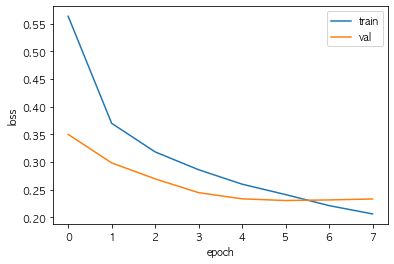

In [15]:
# 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

plt.show()

In [16]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 5ms/step - loss: 0.2306 - accuracy: 0.9174


[0.2305999994277954, 0.9174166917800903]

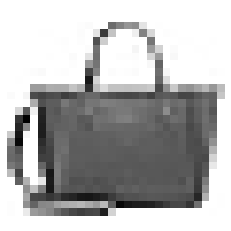

In [23]:
# 이미지 확인해보기
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.axis('off')
plt.show()

In [24]:
pred = model.predict(val_scaled[0:1])
print(pred)

1/1 [==============================] - 0s 107ms/step
[[3.1335638e-13 1.9915651e-19 1.1134032e-16 4.8002882e-15 1.5104367e-16
  2.0384839e-14 1.2732223e-14 6.5247788e-14 1.0000000e+00 1.9838513e-14]]


In [25]:
# 계단함수
import numpy as np

classes = ['티셔츠','바지','스웨터','드레스','코트','샌들','셔츠','스니커즈','가방','앵클부츠']

In [28]:
print(classes[np.argmax(pred)])

가방


### test 데이터 확인

In [29]:
test_scaled = test_input.reshape(-1,28,28,1) / 255.0

In [30]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 5ms/step - loss: 0.2512 - accuracy: 0.9125


[0.25118687748908997, 0.9125000238418579]